# <font color='green'><b/><center>Mean Shift Clustering Algorithm</center></font>

## <b/> Import Necessary Libraries

In [23]:
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical computations
import matplotlib.pyplot as plt  # For plotting graphs

from sklearn.cluster import MeanShift              # For MeanShift clustering
from sklearn.datasets import make_blobs            # For generating sample data
from sklearn.cluster import estimate_bandwidth     # For estimating bandwidth

# Import Axes3D from mpl_toolkits.mplot3d for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

## <b/> Make Data Points (Blobs)

In [24]:
# Define the coordinates of the centers for the clusters
coordinates = [[2, 2, 3], [6, 7, 8], [5, 10, 13]]

# Generate sample data with 150 data points
# The centers of the clusters are specified by the coordinates
# The cluster_std parameter determines the standard deviation of the clusters
x, _ = make_blobs(n_samples=150, centers=coordinates, cluster_std=0.60)

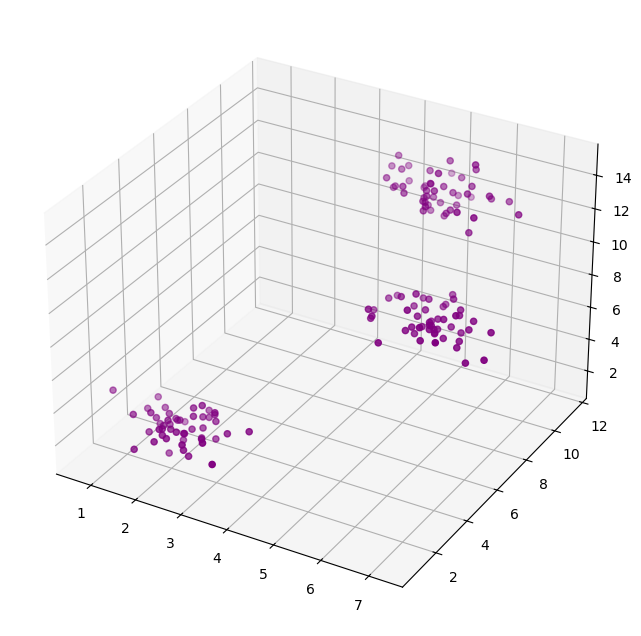

In [25]:
# Create a new figure with a specified size
data_fig = plt.figure(figsize=(10, 8))

# Add a 3D subplot to the figure
ax = data_fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot of the data points
ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='o', color='purple')

# Display the plot
plt.show()

## <b/> Mean Shift Clustering

In [26]:
# Estimate the bandwidth parameter for Mean Shift clustering
bandwidth = estimate_bandwidth(x, quantile=0.2, n_samples=500)

In [27]:
# Initialize MeanShift clustering with the estimated bandwidth and bin seeding
msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)

# Fit the MeanShift model to the data
msc.fit(x)

# Retrieve the cluster centers
cluster_centers = msc.cluster_centers_

# Retrieve the cluster labels assigned to each data point
labels = msc.labels_

# Get the unique cluster labels
cluster_label = np.unique(labels)

# Count the number of clusters
n_clusters = len(cluster_label)

# Display the number of clusters
n_clusters

3

## <b/> Plot the Mean Shift Clusters

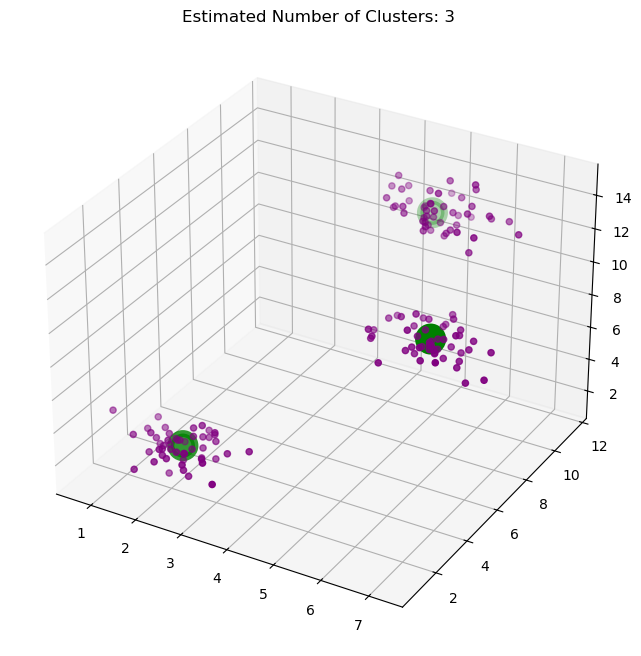

In [28]:
# Create a new figure with a specified size
msc_fig = plt.figure(figsize=(10, 8))

# Add a 3D subplot to the figure
ax = msc_fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot of the data points
ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='o', color='purple')

# Plot the cluster centers as large green markers
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], 
           marker='o', color='green', s=300, lw=5, zorder=10)

# Set the title of the plot
plt.title('Estimated Number of Clusters: %d' % n_clusters)

# Display the plot
plt.show()

------